# Support Vector Machine 

### Data Collection

In this notebook we use the Breast Cancer dataset which can be downloaded from UCI Machine Learning repository. The dataset is available in sklearn library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Import Cancer data from the Sklearn library
# Dataset can also be found here (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

As we can see above, not much can be done in the current form of the dataset. We need to view the data in a better format.

#### Let's view the data in a dataframe.

In [3]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


#### Let's Explore Our Dataset

In [4]:
df_cancer.shape

(569, 31)

As we can see,we have 596 rows (Instances) and 31 columns(Features)

In [5]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Above is the name of each columns in our dataframe.

#### The next step is to Visualize our data

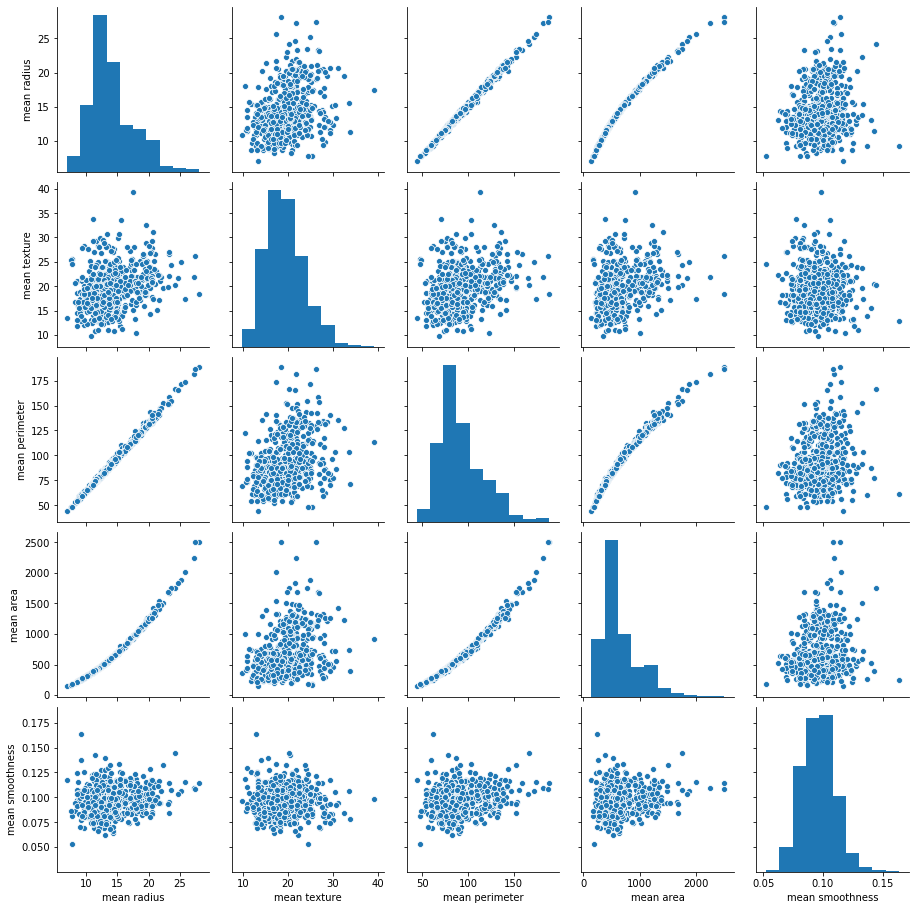

In [6]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] )

The above plots shows the relationship between our features. But the only problem with them is that they do not show us which of the "dots" is Malignant and which is Benign. 

This issue will be addressed below by using "target" variable as the "hue" for the plots.

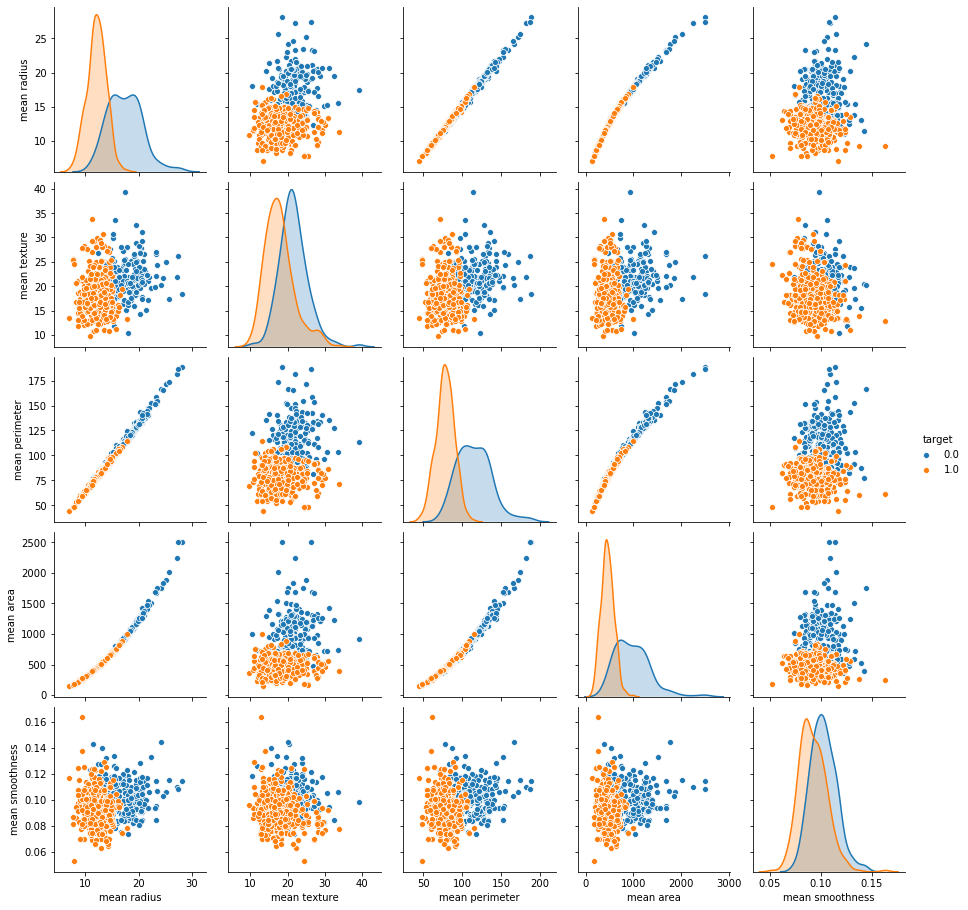

In [7]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

**Note:** 
    
  1.0 (Orange) = Benign (No Cancer)
  
  0.0 (Blue) = Malignant (Cancer)

#### How many Benign and Malignant do we have in our dataset?

In [8]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

As we can see, we have 212 - Malignant, and 357 - Benign

 Let's visulaize our counts

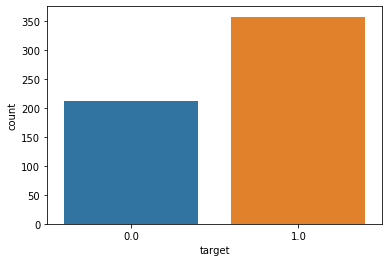

In [9]:
sns.countplot(df_cancer['target'], label = "Count") 

#### Let's check the correlation between our features 

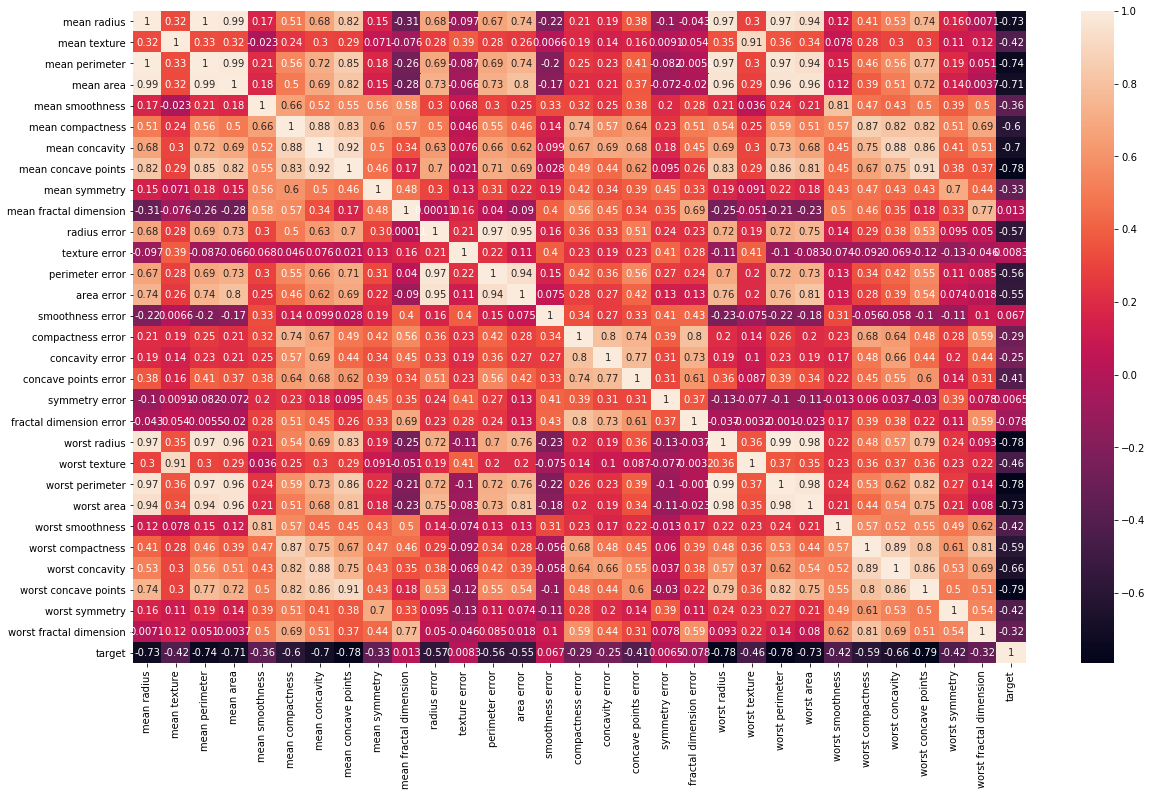

In [10]:
plt.figure(figsize=(20,12)) 
corrMat = df_cancer.corr()
sns.heatmap(corrMat, annot=True) 

In [11]:
columns = np.full((corrMat.shape[0],), True, dtype=bool)
for i in range(corrMat.shape[0]):
    for j in range(i+1, corrMat.shape[0]):
        if corrMat.iloc[i,j] >= 0.5 or corrMat.iloc[i,j] <= -0.5:
            if columns[j]:
                columns[j] = False

In [12]:
selected_columns = df_cancer.columns[columns]
selected_columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'texture error',
       'smoothness error', 'symmetry error'],
      dtype='object')

### Data pre-processing

In [13]:
features = df_cancer[selected_columns]
features.head()

,mean radius,mean texture,mean smoothness,texture error,smoothness error,symmetry error
0,17.99,10.38,0.11840,0.9053,0.006399,0.03003
1,20.57,17.77,0.08474,0.7339,0.005225,0.01389
2,19.69,21.25,0.10960,0.7869,0.006150,0.02250
3,11.42,20.38,0.14250,1.1560,0.009110,0.05963
4,20.29,14.34,0.10030,0.7813,0.011490,0.01756


In [14]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(features)


### Splitting Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Support Vector Machine (SVM) Model 

### Training the model

In [18]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Validating the model

In [19]:
y_predict = svc_model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'], columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,89,4
is_healthy,1,49


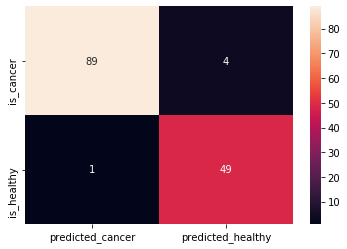

In [22]:
sns.heatmap(confusion, annot=True)

In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        50
         1.0       0.99      0.96      0.97        93

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



**Awesome performance! Our model gets an overall accuracy of 97%.**